<a href="https://colab.research.google.com/github/LucyLightCode/Mayfair_project_sentiment_analysis/blob/main/mayfair_sentiment_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBRARIES & PACKAGES

In [ ]:
!pip install emoji

In [ ]:
!pip install langdetect

In [ ]:
!pip install contractions

In [4]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=6dc1e0ffd7789d1a105621dae16962e59416308494d10b3018a95adb0b018143
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import emoji
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from googletrans import Translator
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

In [6]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
#nltk.download('punkt_tab', download_dir='/root/nltk_data')
nltk.download('wordnet', download_dir='/root/nltk_data')
nltk.download('omw-1.4', download_dir='/root/nltk_data')
nltk.download('stopwords', download_dir='/root/nltk_data')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## LOAD THE DATASET

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Mayfair Project/mayfair_project_review_data.csv')

In [9]:
df.head(10)

,REVIEW_ID,REVIEW_CONTENT,RATING,DATE,COUNTRY
0,6.01E+16,"Same to this one as well, very classy and soft...",5.0,11/8/2024,United States
1,6.01E+16,"Beautiful colors, exactly what I wanted, but ...",4.0,10/15/2024,United States
2,6.01E+16,"This is top notch scarf, so soft and classy no...",5.0,11/8/2024,United States
3,6.01E+16,Item was great; would buy from seller again!,5.0,11/10/2024,United States
4,6.01E+16,Nice item,5.0,10/1/2024,United States
5,6.01E+16,Beautiful scarf🧣Beautiful scarf🧣Beautiful scar...,5.0,10/24/2024,United States
6,5.02E+16,The scarf color is neatly and the material is ...,5.0,11/4/2024,United States
7,6.01E+16,"Very cute super soft, the fabric is Silk",5.0,10/31/2024,United States
8,6.01E+16,👍💯💥💝🤩💚💖❤️‍🔥💙🎶😎 great toile bandana style,5.0,10/3/2024,United States
9,6.01E+16,"Just as pictured, fast shipping, very satisfied",5.0,10/12/2024,United States


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8492 entries, 0 to 8491
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REVIEW_ID       8492 non-null   object 
 1   REVIEW_CONTENT  7869 non-null   object 
 2   RATING          8128 non-null   float64
 3   DATE            8492 non-null   object 
 4   COUNTRY         8492 non-null   object 
dtypes: float64(1), object(4)
memory usage: 331.8+ KB


In [11]:
df.isnull().sum()

,0
REVIEW_ID,0
REVIEW_CONTENT,623
RATING,364
DATE,0
COUNTRY,0


In [12]:
df.duplicated().sum()

np.int64(157)

In [13]:
df.nunique()

,0
REVIEW_ID,6152
REVIEW_CONTENT,7602
RATING,5
DATE,1056
COUNTRY,107


In [14]:
df.describe(include='all')  # Includes numerical and categorical columns

,REVIEW_ID,REVIEW_CONTENT,RATING,DATE,COUNTRY
count,8492,7869,8128.000000,8492,8492
unique,6152,7602,NaN,1056,107
top,3.01E+16,Good,NaN,3/24/2025,United Kingdom
freq,1054,37,NaN,143,2935
mean,NaN,NaN,4.408095,NaN,NaN
std,NaN,NaN,0.980011,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN


#  EDA

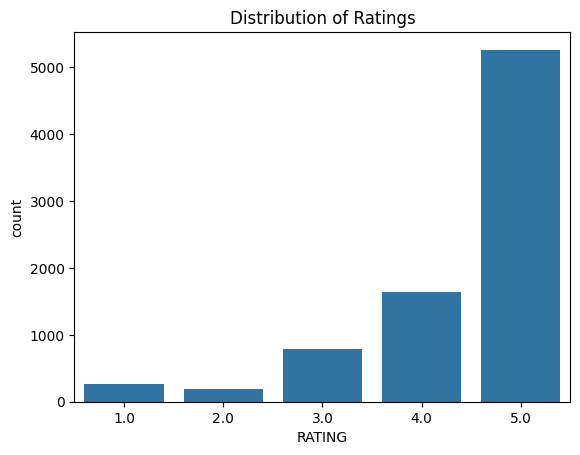

In [15]:
# Understand the frequency of each rating score
sns.countplot(x='RATING', data=df)
plt.title('Distribution of Ratings')
plt.show()

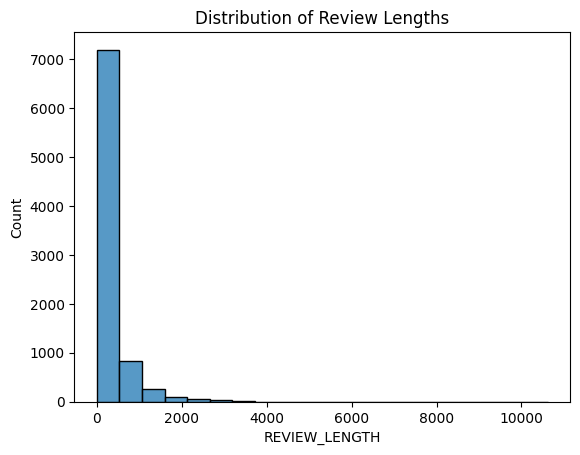

In [16]:
#Explore the length of reviews and potential relationship with ratings.
df['REVIEW_LENGTH'] = df['REVIEW_CONTENT'].astype(str).apply(len)
sns.histplot(df['REVIEW_LENGTH'], bins=20)
plt.title('Distribution of Review Lengths')
plt.show()

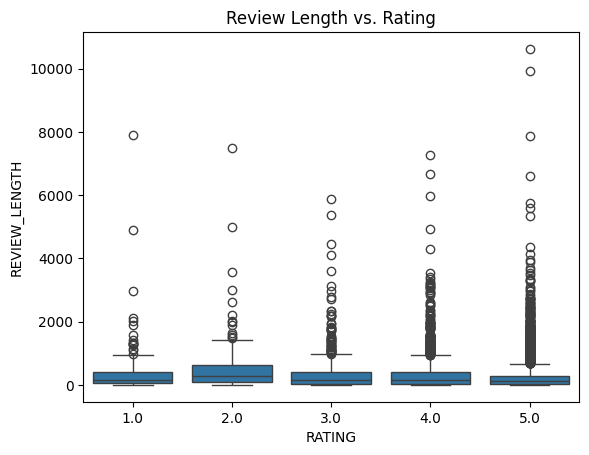

In [17]:
# Relationship between review length and rating
sns.boxplot(x='RATING', y='REVIEW_LENGTH', data=df)
plt.title('Review Length vs. Rating')
plt.show()

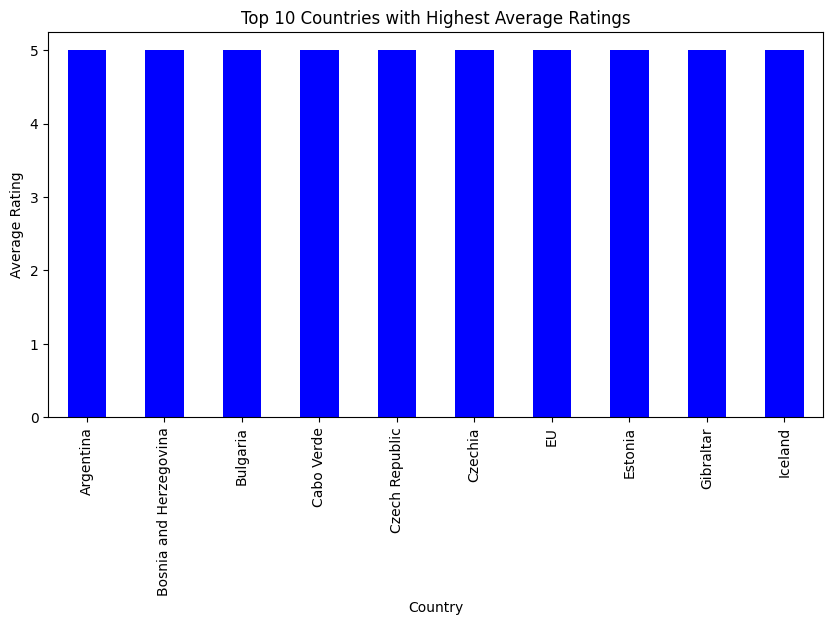

In [18]:
# Top 5 countries with highest ratings
top_10_highest = df.groupby('COUNTRY')['RATING'].mean().nlargest(10)
plt.figure(figsize=(10, 5))
top_10_highest.plot(kind='bar', color='blue')
plt.title('Top 10 Countries with Highest Average Ratings')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.show()

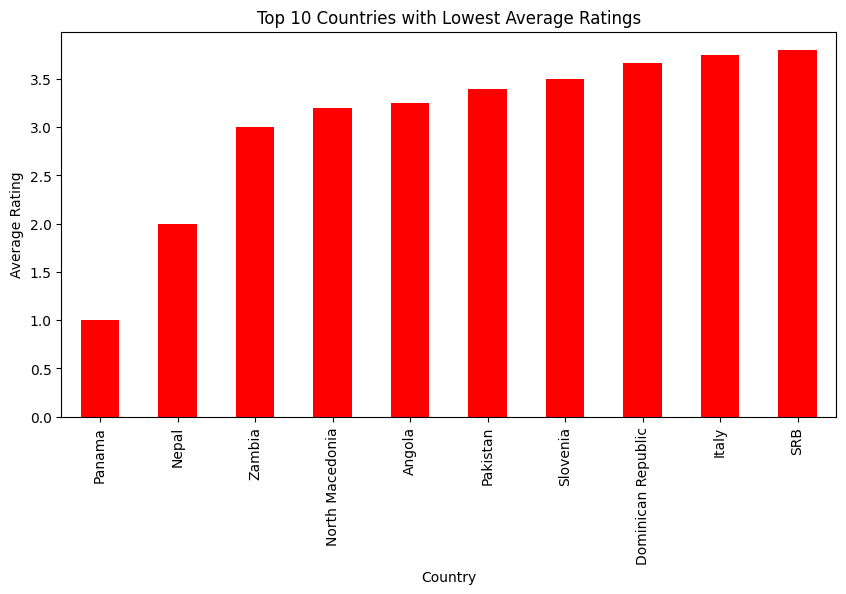

In [19]:
# Top 5 countries with lowest ratings
top_10_lowest = df.groupby('COUNTRY')['RATING'].mean().nsmallest(10)
plt.figure(figsize=(10, 5))
top_10_lowest.plot(kind='bar', color='red')
plt.title('Top 10 Countries with Lowest Average Ratings')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.show()

In [20]:
df['DATE'] = pd.to_datetime(df['DATE'])  # Convert to datetime
df['YEAR'] = df['DATE'].dt.year

In [21]:
yearly_data = df.groupby('YEAR').agg(
    AVERAGE_RATING=('RATING', 'mean'),
    REVIEW_COUNT=('REVIEW_CONTENT', 'count')
).reset_index()

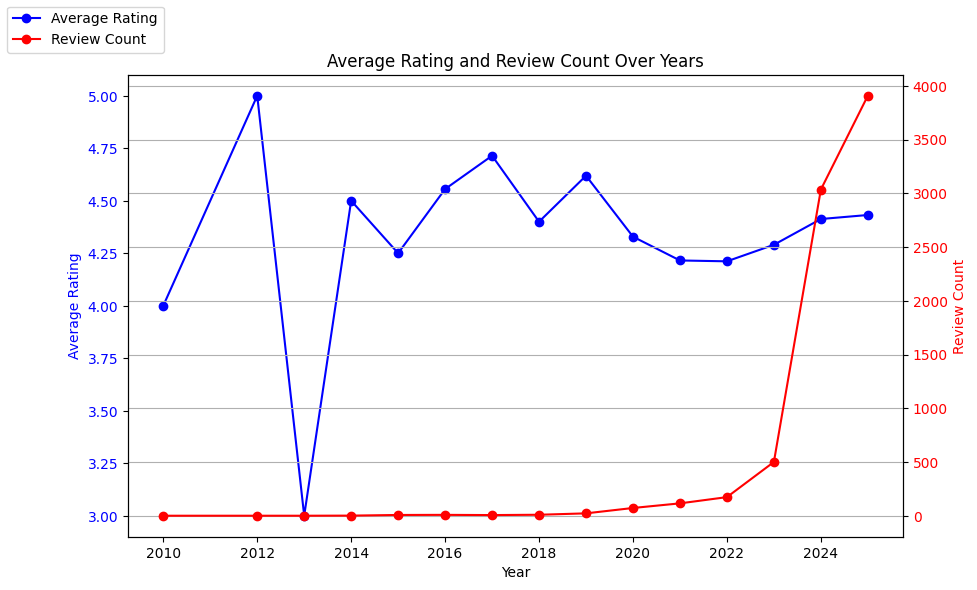

In [22]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average rating
ax1.plot(yearly_data['YEAR'], yearly_data['AVERAGE_RATING'], color='blue', label='Average Rating',marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rating', color='blue')
ax1.tick_params('y', labelcolor='blue')

# Create a second y-axis for review count
ax2 = ax1.twinx()
ax2.plot(yearly_data['YEAR'], yearly_data['REVIEW_COUNT'], color='red', label='Review Count',marker='o')
ax2.set_ylabel('Review Count', color='red')
ax2.tick_params('y', labelcolor='red')

# Add title and legend
plt.title('Average Rating and Review Count Over Years')
fig.legend(loc='upper left')
plt.grid(True)

plt.show()

## DATA CLEANING & PREPROCESSING

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from googletrans import Translator
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.stem import WordNetLemmatizer

In [24]:
# Rename columns correctly
df = df.rename(columns={'REVIEW_CONTENT': 'content', 'RATING': 'rating'})

# Subset only the relevant columns
df = df[['content', 'rating']]

# Display the first few rows
df.head(10)

,content,rating
0,"Same to this one as well, very classy and soft...",5.0
1,"Beautiful colors, exactly what I wanted, but ...",4.0
2,"This is top notch scarf, so soft and classy no...",5.0
3,Item was great; would buy from seller again!,5.0
4,Nice item,5.0
5,Beautiful scarf🧣Beautiful scarf🧣Beautiful scar...,5.0
6,The scarf color is neatly and the material is ...,5.0
7,"Very cute super soft, the fabric is Silk",5.0
8,👍💯💥💝🤩💚💖❤️‍🔥💙🎶😎 great toile bandana style,5.0
9,"Just as pictured, fast shipping, very satisfied",5.0


In [25]:
# Ensure language detection consistency
DetectorFactory.seed = 0

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
custom_stopwords = {"would", "shall", "could", "might"}
stop_words.update(custom_stopwords)
stop_words.discard("not")  # Retain "not" for sentiment analysis


In [26]:
### 1. DATA CLEANING & PREPROCESSING ###
# Function to check if a review is in English
def is_english(text):
    try:
        return detect(text) == "en"
    except LangDetectException:
        return False

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = emoji.replace_emoji(text, replace="")  # Remove emojis
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters & numbers
    text = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words])
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Remove duplicates & missing values
df = df.drop_duplicates(subset='content', keep='first')
df = df.dropna(subset=['content', 'rating'])
# Convert RATING to integer (if it's stored as float)
df['rating'] = df['rating'].astype(int)
df = df[df['content'].apply(is_english)]  # Keep only English reviews

df['cleaned_review'] = df['content'].apply(clean_text)

In [27]:
df.head(10)

,content,rating,cleaned_review
0,"Same to this one as well, very classy and soft...",5,one well classy soft bad smell perfect neck vi...
1,"Beautiful colors, exactly what I wanted, but ...",4,beautiful color exactly wanted item defect
2,"This is top notch scarf, so soft and classy no...",5,top notch scarf soft classy smell perfect neck...
3,Item was great; would buy from seller again!,5,item great buy seller
4,Nice item,5,nice item
6,The scarf color is neatly and the material is ...,5,scarf color neatly material also soo satisfied...
7,"Very cute super soft, the fabric is Silk",5,cute super soft fabric silk
8,👍💯💥💝🤩💚💖❤️‍🔥💙🎶😎 great toile bandana style,5,great toile bandana style
9,"Just as pictured, fast shipping, very satisfied",5,pictured fast shipping satisfied
10,Gorgeous and fast shipping!,5,gorgeous fast shipping


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7114 entries, 0 to 8491
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         7114 non-null   object
 1   rating          7114 non-null   int64 
 2   cleaned_review  7114 non-null   object
dtypes: int64(1), object(2)
memory usage: 222.3+ KB


In [29]:
# Create Label column based on RATING
df['labels'] = df['rating'].apply(lambda x: 2 if x >= 4 else (1 if x == 3 else 0))

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [33]:
# Split into train (80%) and test (20%)
# Make sure this is imported

df = df[df['cleaned_review'].notna()] # Ensure 'cleaned_review' column has no missing values

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df['labels'])

# Creating bag of words from cleaned_review column
vectorizer = CountVectorizer()
train_bow = vectorizer.fit_transform(train_data["cleaned_review"])
test_bow = vectorizer.transform(test_data["cleaned_review"])

In [34]:
# Creating bag of words from cleaned_review column
#vectorizer = CountVectorizer()
#train_bow = vectorizer.fit_transform(train_data["cleaned_review"])
#test_bow = vectorizer.transform(test_data["cleaned_review"])

In [42]:
# Creating tfidf matrix from cleaned_review column
vectorizer = TfidfVectorizer()
train_tfidf = vectorizer.fit_transform(train_data["cleaned_review"])
test_tfidf = vectorizer.transform(test_data["cleaned_review"])

In [43]:
# compute class weight to handle imbalance
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(train_data['labels']),
                                     y=train_data['labels'])
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Instantiate classifiers with class weights, use class_weights as a list
classifier_bow = MultinomialNB(class_prior=class_weights.tolist()) # Changed to list
classifier_tfidf = MultinomialNB(class_prior=class_weights.tolist()) # Changed to list

# Fit the models
classifier_bow.fit(train_bow, train_data['labels'])
classifier_tfidf.fit(train_tfidf, train_data['labels'])




MultinomialNB(class_prior=[5.965408805031447, 3.6551059730250484,
                           0.3908117016893284])

In [44]:
# Save the train and test datasets to separate files
train_data.to_csv("train_dataset.csv", index=False)
test_data.to_csv("test_dataset.csv", index=False)

In [45]:
# list of unique,classes in the label column
train_data["labels"].unique()

# In mapping ==>  old value : new value
mapped_values = {2 : "Positive",
                 1 : "Neutral" ,
                 0 : "Negative"}

In [46]:
train_data['labels'] = train_data['labels'].map(mapped_values)

In [47]:
test_data['labels'] = test_data['labels'].map(mapped_values)

In [48]:
train_data.head()

,content,rating,cleaned_review,labels
6698,A most helpful gadget for travel and seems to ...,4,helpful gadget travel seems good quality need ...,Positive
7391,After 3 months it doesn’t work proper…I put my...,1,month doesnt work properi put phone charge go ...,Negative
7920,Purchased a 75 x 45 doormat for our back door ...,5,purchased x doormat back door blue lightweight...,Positive
178,"Good product, thank you seller",5,good product thank seller,Positive
8162,Purchased to use on wheelchair which is pretty...,5,purchased use wheelchair pretty uncomfortable ...,Positive


In [49]:
test_data.head()

,content,rating,cleaned_review,labels
4387,I recommend well clean pc and keyboard good pr...,5,recommend well clean pc keyboard good price fa...,Positive
4968,Excellent easy to install camera. I am using m...,5,excellent easy install camera using mine shed ...,Positive
727,"Super elk, tsyna yakiste is good, shvidko came...",5,super elk tsyna yakiste good shvidko came rozm...,Positive
913,i think i got the wrong size but i’m 5’9 and t...,3,think got wrong size im length fine not stretc...,Neutral
6298,"Good value for money, low maintenance, easy to...",5,good value money low maintenance easy assemble...,Positive


## MODELLING

In [ ]:
# Vader on the normal sentences
# Vader on sentences without stop words
# Custom on train_tfidf
# Custom on train_bow

In [50]:
# Vader on the content sentences
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [51]:
analyzer = SentimentIntensityAnalyzer()

In [52]:
example_content = "I hate this product! It's bad."

In [53]:
sentiment_scores = analyzer.polarity_scores(example_content)
sentiment_scores

{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.8172}

In [54]:
compound_score = sentiment_scores["compound"]

In [55]:
compound_score

-0.8172

In [56]:
def get_sentiment_label(text):
    """
    Calculates the sentiment label of a text using VADER.

    Args:
        text: The text to analyze.

    Returns:
        The sentiment label (Positive, Negative, or Neutral).
    """

    sentiment_scores = analyzer.polarity_scores(text)  # Get sentiment scores
    compound_score = sentiment_scores["compound"]  # Extract compound score

    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [57]:
get_sentiment_label(example_content)

'Negative'

In [58]:
# Apply the function to the 'content' column to create a new column
test_data["vader_to_content"] = test_data["content"].apply(get_sentiment_label)

In [59]:
# Vader on the cleaned_review column
test_data["vader_to_cleaned_review"] = test_data["cleaned_review"].apply(get_sentiment_label)

In [60]:
## training custom models on bag of words and tf-idf

In [61]:
train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 152560 stored elements and shape (5691, 14954)>

In [62]:
train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 152560 stored elements and shape (5691, 14954)>

In [63]:
## Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [64]:
## creating classifier objects for tfidf and bow models
classifier_bow = MultinomialNB()
classifier_tfidf = MultinomialNB()

In [65]:
# fit the models
classifier_bow.fit(train_bow, train_data["labels"])
classifier_tfidf.fit(train_tfidf, train_data["labels"])

MultinomialNB()

In [66]:
train_data['labels'].nunique()

3

In [67]:
test_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 36306 stored elements and shape (1423, 14954)>

In [68]:
test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 36306 stored elements and shape (1423, 14954)>

In [69]:
# making predictions with classifer
#pred_bow = classifier_bow.predict(test_bow)
#pred_tfidf = classifier_tfidf.predict(test_tfidf)

In [70]:
test_data['bow'] = classifier_bow.predict(test_bow)

In [71]:
test_data['tfidf'] = classifier_tfidf.predict(test_tfidf)

In [72]:
test_data.head()

,content,rating,cleaned_review,labels,vader_to_content,vader_to_cleaned_review,bow,tfidf
4387,I recommend well clean pc and keyboard good pr...,5,recommend well clean pc keyboard good price fa...,Positive,Positive,Positive,Positive,Positive
4968,Excellent easy to install camera. I am using m...,5,excellent easy install camera using mine shed ...,Positive,Positive,Positive,Positive,Positive
727,"Super elk, tsyna yakiste is good, shvidko came...",5,super elk tsyna yakiste good shvidko came rozm...,Positive,Positive,Positive,Positive,Positive
913,i think i got the wrong size but i’m 5’9 and t...,3,think got wrong size im length fine not stretc...,Neutral,Positive,Positive,Positive,Positive
6298,"Good value for money, low maintenance, easy to...",5,good value money low maintenance easy assemble...,Positive,Positive,Positive,Positive,Positive


**MODELE EVALUATION : Using Accracy score and clasiffication report**

In [73]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [74]:
test_data.head()

,content,rating,cleaned_review,labels,vader_to_content,vader_to_cleaned_review,bow,tfidf
4387,I recommend well clean pc and keyboard good pr...,5,recommend well clean pc keyboard good price fa...,Positive,Positive,Positive,Positive,Positive
4968,Excellent easy to install camera. I am using m...,5,excellent easy install camera using mine shed ...,Positive,Positive,Positive,Positive,Positive
727,"Super elk, tsyna yakiste is good, shvidko came...",5,super elk tsyna yakiste good shvidko came rozm...,Positive,Positive,Positive,Positive,Positive
913,i think i got the wrong size but i’m 5’9 and t...,3,think got wrong size im length fine not stretc...,Neutral,Positive,Positive,Positive,Positive
6298,"Good value for money, low maintenance, easy to...",5,good value money low maintenance easy assemble...,Positive,Positive,Positive,Positive,Positive


In [75]:
vader_to_content_accuracy_score = accuracy_score(test_data["labels"], test_data["vader_to_content"])

In [76]:
vader_to_content_accuracy_score*100

80.53408292340126

In [77]:
accuracy = accuracy_score(test_data["labels"], test_data["vader_to_content"])
#printing results
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(test_data["labels"], test_data["vader_to_content"]))

Accuracy: 0.81
              precision    recall  f1-score   support

    Negative       0.28      0.43      0.34        79
     Neutral       0.13      0.07      0.09       130
    Positive       0.90      0.91      0.90      1214

    accuracy                           0.81      1423
   macro avg       0.43      0.47      0.44      1423
weighted avg       0.79      0.81      0.80      1423



<Figure size 1000x700 with 0 Axes>

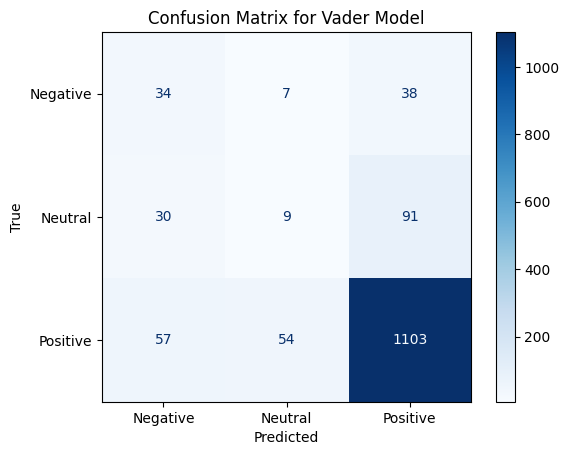

In [78]:
# confusion matrix on content
cm_vader_to_content = confusion_matrix(test_data["labels"], test_data["vader_to_content"])
plt.figure(figsize=(10, 7))
disp_vader_to_content = ConfusionMatrixDisplay(confusion_matrix=cm_vader_to_content, display_labels=classifier_bow.classes_)
disp_vader_to_content.plot(cmap="Blues")
plt.title('Confusion Matrix for Vader Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [79]:
vader_to_cleaned_review_accuracy_score = accuracy_score(test_data["labels"], test_data["vader_to_cleaned_review"])

In [80]:
vader_to_cleaned_review_accuracy_score*100

80.04216444132115

In [81]:
accuracy = accuracy_score(test_data["labels"], test_data["vader_to_cleaned_review"])
#printing results
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(test_data["labels"], test_data["vader_to_cleaned_review"]))

Accuracy: 0.80
              precision    recall  f1-score   support

    Negative       0.25      0.35      0.30        79
     Neutral       0.15      0.09      0.11       130
    Positive       0.89      0.91      0.90      1214

    accuracy                           0.80      1423
   macro avg       0.43      0.45      0.44      1423
weighted avg       0.79      0.80      0.79      1423



<Figure size 1000x700 with 0 Axes>

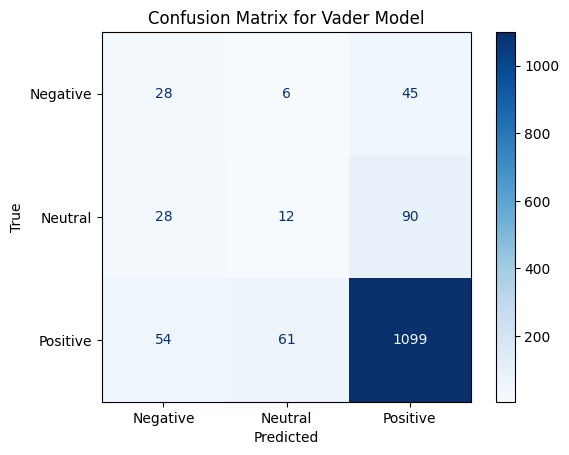

In [82]:
cm_vader_to_cleaned_review = confusion_matrix(test_data["labels"], test_data["vader_to_cleaned_review"])
plt.figure(figsize=(10, 7))
disp_vader_to_cleaned_review = ConfusionMatrixDisplay(confusion_matrix=cm_vader_to_cleaned_review, display_labels=classifier_bow.classes_)
disp_vader_to_cleaned_review.plot(cmap="Blues")
plt.title('Confusion Matrix for Vader Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [83]:
bow_accuracy_score = accuracy_score(test_data["labels"], test_data["bow"])

In [84]:
bow_accuracy_score*100

85.52354181307098

In [85]:
accuracy = accuracy_score(test_data["labels"], test_data["bow"])
#printing results
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(test_data["labels"], test_data["bow"]))

Accuracy: 0.86
              precision    recall  f1-score   support

    Negative       0.75      0.04      0.07        79
     Neutral       0.42      0.04      0.07       130
    Positive       0.86      1.00      0.92      1214

    accuracy                           0.86      1423
   macro avg       0.68      0.36      0.36      1423
weighted avg       0.81      0.86      0.80      1423



<Figure size 1000x700 with 0 Axes>

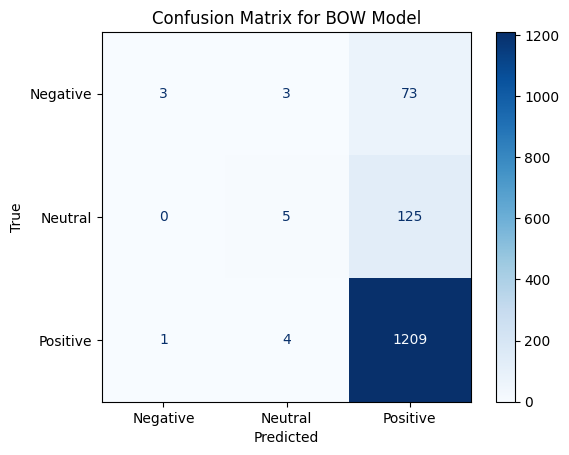

In [86]:
# confusion matrix for the 'bow' predictions:
cm_bow = confusion_matrix(test_data["labels"], test_data["bow"])
plt.figure(figsize=(10, 7))
disp_bow = ConfusionMatrixDisplay(confusion_matrix=cm_bow, display_labels=classifier_bow.classes_)
disp_bow.plot(cmap="Blues")
plt.title('Confusion Matrix for BOW Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [87]:
tfidf_accuracy_score = accuracy_score(test_data["labels"], test_data["tfidf"])

In [88]:
tfidf_accuracy_score*100

85.31271960646521

In [89]:
accuracy = accuracy_score(test_data["labels"], test_data["tfidf"])
#printing results
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(test_data["labels"], test_data["tfidf"],zero_division=0))

Accuracy: 0.85
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        79
     Neutral       0.00      0.00      0.00       130
    Positive       0.85      1.00      0.92      1214

    accuracy                           0.85      1423
   macro avg       0.28      0.33      0.31      1423
weighted avg       0.73      0.85      0.79      1423



<Figure size 1000x700 with 0 Axes>

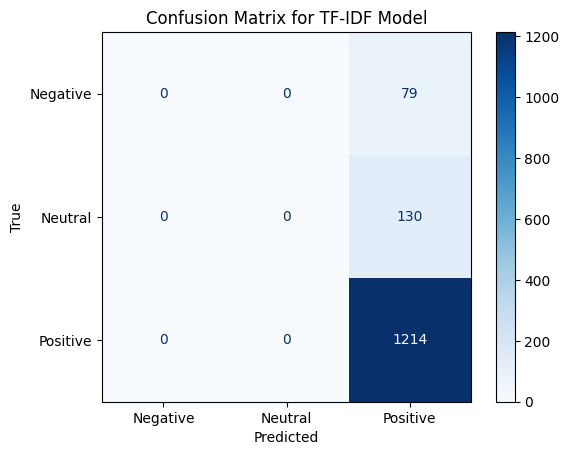

In [90]:
cm_tfidf = confusion_matrix(test_data["labels"], test_data["tfidf"])
plt.figure(figsize=(10, 7))
disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=classifier_tfidf.classes_)
disp_tfidf.plot(cmap="Blues")
plt.title('Confusion Matrix for TF-IDF Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In conclution:The best perfoming model/pipeline is the cleaed_review to BOW to MultinomialNB

In [91]:
def prediction(content):
  """
  remove stopwords convert remaing content to bag of words
  pass the bag of words to classifier_bow
  return the prediction
  """
  filtered_content = clean_text(content)
  bow_content = vectorizer.transform([filtered_content])
  prediction = classifier_bow.predict(bow_content)
  return prediction

In [92]:
example_content = "I hate this product! It's bad"
prediction(example_content)

array(['Positive'], dtype='<U8')

In [93]:
example_content = "I love this product! It's amazing."
prediction(example_content)

array(['Positive'], dtype='<U8')

In [94]:
example_content = "I can say much on how I feel about this product."
prediction(example_content)

array(['Positive'], dtype='<U8')

In [95]:
example_content = " The worst product ever! It's bad looking."

In [96]:
prediction(example_content)

array(['Positive'], dtype='<U8')

DEPLOYMENT: INFERENCE SCRIPT AND FLASK APP

In [97]:
##create an inference function to recive a text, remove stopwords, convert to bow and pass to MUltinomialNB model

stop_words = set(stopwords.words("english"))
def remove_stopwords(text,stop_words = stop_words):
  words = nltk.word_tokenize(text)
  # Remove stopwords from the text
  filtered_words = [word for word in words if word.lower() not in stop_words]
  # Reconstruct the text without stopwords
  filtered_content = " ".join(filtered_words)
  #print(filtered_text)

  return filtered_content

def prediction(content):

  filtered_content = clean_text(content)
  bow_content = vectorizer.transform([filtered_content])
  prediction = classifier_bow.predict(bow_content)
  return prediction



In [98]:
example_content = "I hate this product! with passion"
prediction(example_content)

array(['Positive'], dtype='<U8')

In [99]:
###FLASK APP

!pip install Flask


In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def prediction(content):
  filtered_content = clean_text(content)
  bow_content = vectorizer.transform([filtered_content])
  prediction = classifier_bow.predict(bow_content)
  return prediction


if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)
